# Exercise 06: k-nearest neighbors

Welcome to the sixth exercise for Applied Machine Learning. 

Your objectives for this session are to: 
- understand and apply feature scaling as an extra preprocessing step, 
- implement `KNeighborsRegressor`, and
- tune model hyperparameters with `GridSearchCV`.

---------------------

### Part 1: Data exploration and feature engineering

We will again be looking at `HomesSoldHellerup.csv`, so the data is already familar to you if you did the exercises over the last two weeks. But, instead of using parametric models to predict `price`, today we'll use *instance-based learning*.

Let's start by importing our libraries and exploring the dataset.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler

Read in the dataset and inspect the dimensions.

In [2]:
homes_df = pd.read_csv('HomesSoldHellerup.csv', sep=';')
homes_df.shape


(2160, 10)

Take a look at the column names and the first five instances.

In [3]:
homes_df.head()

,Road name,Road Number,Type,m2,Build Year,ZipCode,City,Date of Sale,Type of Sale,Price
0,Tuborgvej,54,Lejlighed,54,1932,2900,Hellerup,20-07-15,Alm. Salg,1700000
1,Tuborgvej,54,Lejlighed,87,1932,2900,Hellerup,12-05-15,Alm. Salg,2815000
2,Tuborgvej,54,Lejlighed,63,1932,2900,Hellerup,29-12-10,Alm. Salg,1575000
3,Tuborgvej,54,Lejlighed,54,1932,2900,Hellerup,10-04-12,Alm. Salg,1340000
4,Tuborgvej,54,Lejlighed,63,1932,2900,Hellerup,04-02-12,Alm. Salg,1435000


One of the columns has the `Date of Sale` with the exact date the house was sold. It seems unlikely that many houses would sell on the exact same date, and the date format can be tricky to work with.

Let's see how many unique values there are in `Date of Sale`.

In [4]:
homes_df['Date of Sale'].nunique()

1218

1218 unique dates across the 2160 totals instances suggests that `Date of Sale` is a *high-cardinality* attribute: it contains a large number of unique values relative to the total number of instances, which can make it challenging for machine learning models to use effectively.

But, there could still be useful information in the `Date of Sale`. For example, maybe homes sell for more in summer than in winter, or maybe homes sell for more in recent years relative to older years. So, to make use of such information, we could do some feature engineering.

Use the code below to create a `Year of Sale` feature by extracting the year from the `Date of Sale` attribute.

In [5]:
homes_df['Year of Sale'] = homes_df['Date of Sale'].apply(lambda x: '20' + x.split('-')[-1])

Check that there's the new `Year of Sale` column.

In [6]:
homes_df.head()

,Road name,Road Number,Type,m2,Build Year,ZipCode,City,Date of Sale,Type of Sale,Price,Year of Sale
0,Tuborgvej,54,Lejlighed,54,1932,2900,Hellerup,20-07-15,Alm. Salg,1700000,2015
1,Tuborgvej,54,Lejlighed,87,1932,2900,Hellerup,12-05-15,Alm. Salg,2815000,2015
2,Tuborgvej,54,Lejlighed,63,1932,2900,Hellerup,29-12-10,Alm. Salg,1575000,2010
3,Tuborgvej,54,Lejlighed,54,1932,2900,Hellerup,10-04-12,Alm. Salg,1340000,2012
4,Tuborgvej,54,Lejlighed,63,1932,2900,Hellerup,04-02-12,Alm. Salg,1435000,2012


What we can also see in the data shown above is that there are different types of variables in the dataset. For example, `Road name`, `Type`, `City`, and `Type of Sale` are all categorical variables, whereas `m2`, `Build Year`, and `Year of Sale` are numeric. 

Use the code below to inspect the variable type assigned to each column. 

In [7]:
homes_df.dtypes

Road name       object
Road Number     object
Type            object
m2               int64
Build Year       int64
ZipCode          int64
City            object
Date of Sale    object
Type of Sale    object
Price            int64
Year of Sale    object
dtype: object

`Year of Sale`, the feature we just added ourselves, is currently considered as an `object` (i.e., a categorical variable). Use the code below to change it to `int64` (i.e., a continuous, numeric variable).

In [8]:
homes_df['Year of Sale'] = homes_df['Year of Sale'].astype('int64')

Now let's look at some descriptive statistics for the continuous variables in the dataset.

In [9]:
homes_df.describe()

,m2,Build Year,ZipCode,Price,Year of Sale
count,2160.000000,2160.000000,2160.000000,2.160000e+03,2160.000000
mean,137.582870,1941.846296,2920.328241,5.214775e+06,2012.676389
std,67.275942,33.952880,309.679072,4.470072e+06,1.700720
min,37.000000,1850.000000,2900.000000,1.333330e+05,2010.000000
25%,86.000000,1919.000000,2900.000000,2.450000e+06,2011.000000
50%,124.000000,1933.000000,2900.000000,4.000000e+06,2013.000000
75%,170.000000,1960.000000,2900.000000,6.600000e+06,2014.000000
max,570.000000,2015.000000,8800.000000,5.000000e+07,2015.000000


In the output above, notice how the attributes have different scales. For example, `m2` has a mean of 138 and ranges between 37 and 570, whereas `Build Year` mean of 1942 and ranges between 1850 and 2015. That makes sense given what the variables represent, but it could affect the performance of an instance-based learning algorithm, which rely on measures of similarity or distance. 

### Part 2: Feature scaling

Now that we've taken a look at our data and done a little feature engineering, it's time to make a train-test split. Then, once we've put aside a test set, we can do some feature scaling to address the issue of varying scales to suit an instance-based learning algorithm like `KNeighborsRegressor`. 

# <font color='red'>TASK 1</font>

Define your feature matrix `X` and target `y`. 

Create `X` with all the available attributes, except for `Date of Sale`, from which we already extracted the year to create the new attrubte, `Year of Sale`. 

`y` should be the `Price` of a home.

In [10]:
X = pd.get_dummies(homes_df.drop(columns=['Date of Sale', 'Price']))
y = homes_df['Price']

Then use the code below to make a train-test split.

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

Now, in addition to our unscaled feature matrices, `X_train` and `X_test`, let's use the `StandardScaler` to standardize the scales of the attributes. 

`StandardScaler` standardizes the scales across features by removing the mean and scaling to unit variance. For example, for each `m2` value, `StandardScaler` will re-scale that value by subtracting the mean `m2` and then dividing that difference by the standard deviation of `m2`. This can be useful because it centers all variables 0. However, `StandardScaler` is sensitive to outliers.

Use the code below to apply `StandardScaler` *separately* to the `X_train` and `X_test`.

In [12]:
scaler = StandardScaler() # define the scaler
X_train_scaled = scaler.fit_transform(X_train) # apply to the training feature matrix
X_test_scaled = scaler.transform(X_test) # apply to the testing feature matrix

In addition to `StandardScaler`, let's also try out `RobustScaler` so we can check if different scaling methods affect model performance.

`RobustScaler` applies a different standardization by substracting the median (instead of the mean) and then divides by the inter-quartile range (instead of the standard deviation). In effect, this means `RobustScaler` is less sensitive to outliers.

# <font color='red'>TASK 2</font>

Apply `RobustScaler` to the `X_train` and `X_test` to create `X_train_robust` and `X_test_robust`.

In [13]:
robust_scaler = RobustScaler() # define the scaler
X_train_robust = robust_scaler.fit_transform(X_train) # apply to the training feature matrix
X_test_robust = robust_scaler.transform(X_test) # apply to the testing feature matrix

### Part 3: Implementing `KNeighborsRegressor`

Now that we have three different kinds of feature matrices:
* `X_train` and `X_test` have the original features without any scaling,
* `X_train_scaled` and `X_test_scaled` have the features with `StandardScaler`, and
* `X_train_robust` and `X_test_robust` have the features with `RobustScaler`.

Let's experiment and see which kind of scaling leads to the best results with `KNeighborsRegressor`.

# <font color='red'>TASK 3</font>

Fit a `KNeighborsRegressor` to `X_train` and `y_train` and define it as `knn`. Then print the model's training and test scores.

In [14]:
knn = KNeighborsRegressor()
knn.fit(X_train, y_train)

KNeighborsRegressor()

In [15]:
# print scores
print("Score on training set: {:.3f}".format(knn.score(X_train, y_train)))
print("Score on test set: {:.3f}".format(knn.score(X_test, y_test)))

Score on training set: 0.663
Score on test set: 0.580


# <font color='red'>TASK 4</font>

Fit a `KNeighborsRegressor` to `X_train_scaled` and `y_train` and define it as `knn_scaled`. Then print the model's training and test scores.

In [16]:
knn_scaled = KNeighborsRegressor()
knn_scaled.fit(X_train_scaled, y_train)

KNeighborsRegressor()

In [17]:
# print scores
print("Score on training set: {:.3f}".format(knn_scaled.score(X_train_scaled, y_train)))
print("Score on test set: {:.3f}".format(knn_scaled.score(X_test_scaled, y_test)))

Score on training set: 0.663
Score on test set: 0.485


# <font color='red'>TASK 5</font>

Fit a `KNeighborsRegressor` to `X_train_robust` and `y_train` and define it as `knn_robust`. Then print the model's training and test scores.

In [18]:
knn_robust = KNeighborsRegressor()
knn_robust.fit(X_train_robust, y_train)

KNeighborsRegressor()

In [19]:
# print scores
print("Score on training set: {:.3f}".format(knn_robust.score(X_train_robust, y_train)))
print("Score on test set: {:.3f}".format(knn_robust.score(X_test_robust, y_test)))

Score on training set: 0.783
Score on test set: 0.753


# <font color='red'>TASK 6</font>

Which kind of feature scaling led to the best performance with `KNeighborsRegressor`? Why do you think that is?

**Answer:** Robust scaling leads to the best performance. This is because instance-based learning algorithms like `KNeighborsRegressor` can be negatively affected by varying scales across attributes. Then the question is: which type of scaling is best? In this dataset, there are some outliers (see plot below), so `RobustScaler` outperforms `StandardScaler`. But ultimately, we only know for sure by experimenting with different scalers.

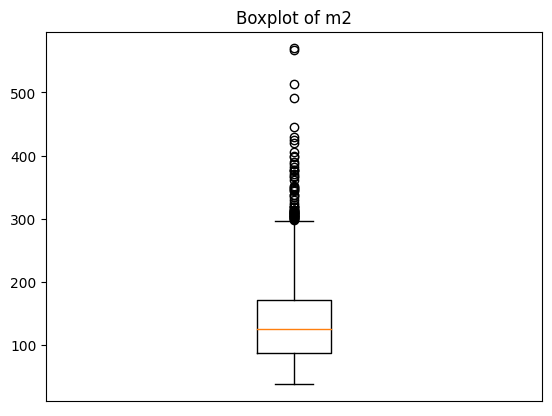

In [20]:
plt.boxplot(homes_df['m2'])
plt.title('Boxplot of m2')
plt.xticks([])  
plt.show()

### Part 4: Tuning hyperparameters with `GridSearchCV`

From our experiment above, we learned which scaling method was best... but can we improve performance even further?

Let's see if tuning hyperparameters helps. With k-nearest neighbor models we can tune things like the number of neighbors to consider for the final prediction (`n_neighbors`), whether all neighbors should be weighed equally (`weights`), and the distance metric used (`metric` and `p`. 

Use the code below to set up a parameter grid.

In [21]:
param_grid = {
    'n_neighbors': [1, 5, 10, 20, 30, 40, 50, 60], # what should we set k to? 
    'weights': ['uniform', 'distance'], # uniform weighting vs. distance weighting
    'p': [1, 2], # 1 for manhattan vs. 2 for euclidean distance
}

# <font color='red'>TASK 7</font>

Use `GridSearchCV` to figure out what the optimal hyperparameter settings are for `knn_robust`. Define the grid search as `grid_search`.

*HINT: Check out the [scikit-learn documentation](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html) for how to implement `GridSearchCV`.*

In [22]:
grid_search = GridSearchCV(estimator=knn_robust,  # the model being tuned
                           param_grid=param_grid,  # dictionary of parameter values to search over
                           cv=5,  # number of folds to use
                           scoring='r2',  # evaluation metric
                           return_train_score=True,  # whether to return training scores in the output.
                           verbose=3)  # controls the verbosity of the output (i.e., how much output to print)

# fit the model with training data X_train_robust and target y_train
grid_search.fit(X_train_robust, y_train)  

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END n_neighbors=1, p=1, weights=uniform;, score=(train=0.999, test=0.707) total time=   0.1s
[CV 2/5] END n_neighbors=1, p=1, weights=uniform;, score=(train=0.999, test=0.515) total time=   0.0s
[CV 3/5] END n_neighbors=1, p=1, weights=uniform;, score=(train=0.999, test=0.363) total time=   0.1s
[CV 4/5] END n_neighbors=1, p=1, weights=uniform;, score=(train=0.999, test=0.612) total time=   0.0s
[CV 5/5] END n_neighbors=1, p=1, weights=uniform;, score=(train=1.000, test=0.527) total time=   0.0s
[CV 1/5] END n_neighbors=1, p=1, weights=distance;, score=(train=0.999, test=0.707) total time=   0.0s
[CV 2/5] END n_neighbors=1, p=1, weights=distance;, score=(train=0.999, test=0.515) total time=   0.0s
[CV 3/5] END n_neighbors=1, p=1, weights=distance;, score=(train=0.999, test=0.363) total time=   0.0s
[CV 4/5] END n_neighbors=1, p=1, weights=distance;, score=(train=0.999, test=0.612) total time=   0.0s
[CV 5/5] END n_n

GridSearchCV(cv=5, estimator=KNeighborsRegressor(),
             param_grid={'n_neighbors': [1, 5, 10, 20, 30, 40, 50, 60],
                         'p': [1, 2], 'weights': ['uniform', 'distance']},
             return_train_score=True, scoring='r2', verbose=3)

Use the code below to print the best hyperparameter settings found, and the scores for `best_knn`, the `KNeighborsRegressor` with tuned hyperparameters.

In [23]:
print("Best hyperparameter settings found: ", grid_search.best_params_)

Best hyperparameter settings found:  {'n_neighbors': 10, 'p': 1, 'weights': 'distance'}


In [24]:
best_knn = grid_search.best_estimator_
print("Score on training set: {:.3f}".format(best_knn.score(X_train_robust, y_train)))
print("Score on test set: {:.3f}".format(best_knn.score(X_test_robust, y_test)))

Score on training set: 1.000
Score on test set: 0.751


Did tuning help much in this case? Maybe... or maybe not so much in this case?

### Bonus section: Including scaling methods in `GridSearchCV`

In this notebook, we applied different scalers to the feature matrix one at a time for the sake of demonstration. However, you can also include different scalers *within* a tuning method like `GridSearchCV` to find the optimal configuration of scaler + hyperparameters all in one go. The code below shows you how to do this by creating a modelling `Pipeline`.

In [25]:
from sklearn.pipeline import Pipeline

# define the pipeline with a placeholder scaler and the KNN regressor
pipe = Pipeline([
    ('scaler', StandardScaler()),  # Placeholder scaler
    ('knn', KNeighborsRegressor())
])

# define the parameter grid to include different scalers and KNN parameters
param_grid = {
    'scaler': [StandardScaler(),  RobustScaler(), 'passthrough'],  # different scaling methods (`passthrough` means no scaling)
    'knn__n_neighbors': [3, 6, 12, 24, 48, 96],
    'knn__weights': ['uniform', 'distance'],
    'knn__p': [1, 2],
}

# set up GridSearchCV with the pipeline and parameter grid
grid_search = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=3,
    scoring='r2',
    return_train_score=True,
    verbose=3
)

#fit the model with the original training data (without prior scaling)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits
[CV 1/3] END knn__n_neighbors=3, knn__p=1, knn__weights=uniform, scaler=StandardScaler();, score=(train=0.742, test=0.482) total time=   0.1s
[CV 2/3] END knn__n_neighbors=3, knn__p=1, knn__weights=uniform, scaler=StandardScaler();, score=(train=0.770, test=0.399) total time=   0.1s
[CV 3/3] END knn__n_neighbors=3, knn__p=1, knn__weights=uniform, scaler=StandardScaler();, score=(train=0.759, test=0.457) total time=   0.1s
[CV 1/3] END knn__n_neighbors=3, knn__p=1, knn__weights=uniform, scaler=RobustScaler();, score=(train=0.824, test=0.652) total time=   0.1s
[CV 2/3] END knn__n_neighbors=3, knn__p=1, knn__weights=uniform, scaler=RobustScaler();, score=(train=0.855, test=0.513) total time=   0.1s
[CV 3/3] END knn__n_neighbors=3, knn__p=1, knn__weights=uniform, scaler=RobustScaler();, score=(train=0.835, test=0.637) total time=   0.1s
[CV 1/3] END knn__n_neighbors=3, knn__p=1, knn__weights=uniform, scaler=passthrough;, score=

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsRegressor())]),
             param_grid={'knn__n_neighbors': [3, 6, 12, 24, 48, 96],
                         'knn__p': [1, 2],
                         'knn__weights': ['uniform', 'distance'],
                         'scaler': [StandardScaler(), RobustScaler(),
                                    'passthrough']},
             return_train_score=True, scoring='r2', verbose=3)

In [26]:
print("Best hyperparameter settings found: ", grid_search.best_params_)

Best hyperparameter settings found:  {'knn__n_neighbors': 12, 'knn__p': 1, 'knn__weights': 'distance', 'scaler': RobustScaler()}


---------
**That's it for this week! Next week we'll try out some unsupervised learning techniquea.**